In [64]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score ,mean_squared_error,classification_report,recall_score,f1_score,precision_score,r2_score
from sklearn.feature_selection import SelectFromModel,VarianceThreshold
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE,f_regression,SelectKBest
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load and prepare dataset
data = pd.read_csv(r'C:\Users\bhasy\Downloads\Dataset\train.csv')

#Seperate features and target variable
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.head())
print(y.head())

  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  ...  Pay_Scale  Compensation_and_Benefits  \
0               

In [66]:
# Identifying missing values
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = missing_datas(X)
print(missing_data)

                           Total   Percent
VAR4                         656  9.371429
VAR2                         577  8.242857
Age                          412  5.885714
Time_of_service              144  2.057143
Work_Life_balance             11  0.157143
Pay_Scale                      9  0.128571
VAR7                           0  0.000000
Gender                         0  0.000000
Education_Level                0  0.000000
Relationship_Status            0  0.000000
Hometown                       0  0.000000
Unit                           0  0.000000
Decision_skill_possess         0  0.000000
Travel_Rate                    0  0.000000
Time_since_promotion           0  0.000000
growth_rate                    0  0.000000
VAR6                           0  0.000000
Post_Level                     0  0.000000
Compensation_and_Benefits      0  0.000000
VAR1                           0  0.000000
VAR3                           0  0.000000
VAR5                           0  0.000000
Employee_ID

In [67]:
#Filling the missing values
X.fillna(0,inplace=True)
X['Age'].replace(0,X['Age'].mean(),inplace=True)
#X.drop(['Employee_ID'],axis=1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          7000 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              7000 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    7000 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            7000 non-null float64
VAR1                         7000 non-null int64
VAR2                         7000 non-null fl

In [68]:
#Check numeric and categorical variables
def numeric(dataset):
    numeric_cols = dataset.select_dtypes(include='number').columns
    return numeric_cols
def categorical(dataset):
    categorical_cols = dataset.select_dtypes(exclude = 'number').columns
    return categorical_cols
numeric_cols = numeric(X)
categorical_cols = categorical(X)
print("Numerical features")
print(numeric_cols)
print("=============")
print("Categorical features")
print(categorical_cols)

Numerical features
Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')
Categorical features
Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')


In [69]:
#Convert employee_ID column into numeric
X['Employee_ID'] = X['Employee_ID'].str.split('_',expand=True)[1]
X.head()
#data['Age'] = data['Age'].astype(int)
#data['Time_of_service'] = data['Time_of_service'].astype(int)
#data['Pay_Scale'] = data['Pay_Scale'].astype(int)
#data['Work_Life_balance'] = data['Work_Life_balance'].astype(int)
#data.info()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,8.0,type2,1.0,3,-1.8176,-0.4537,0.0,3,7,3
4,22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


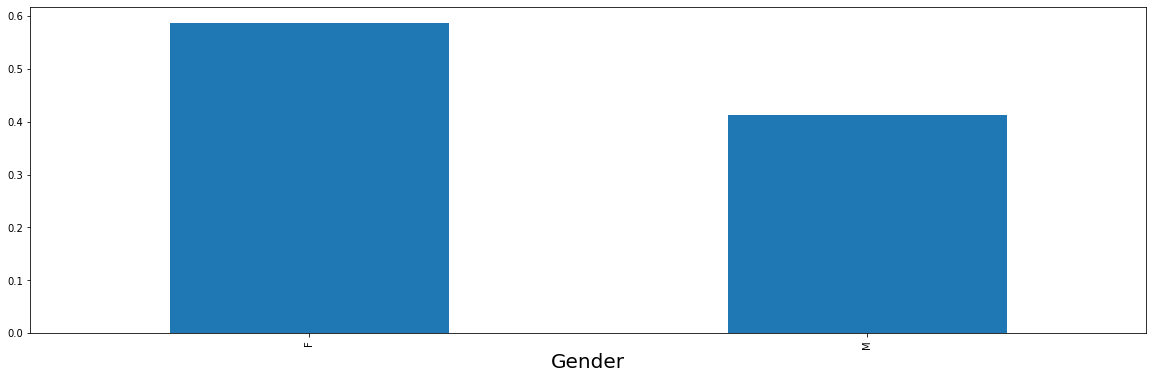

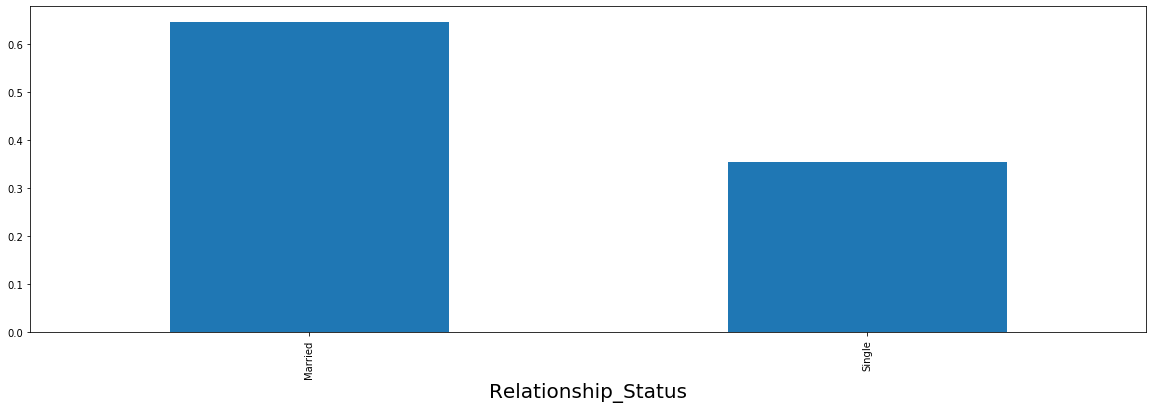

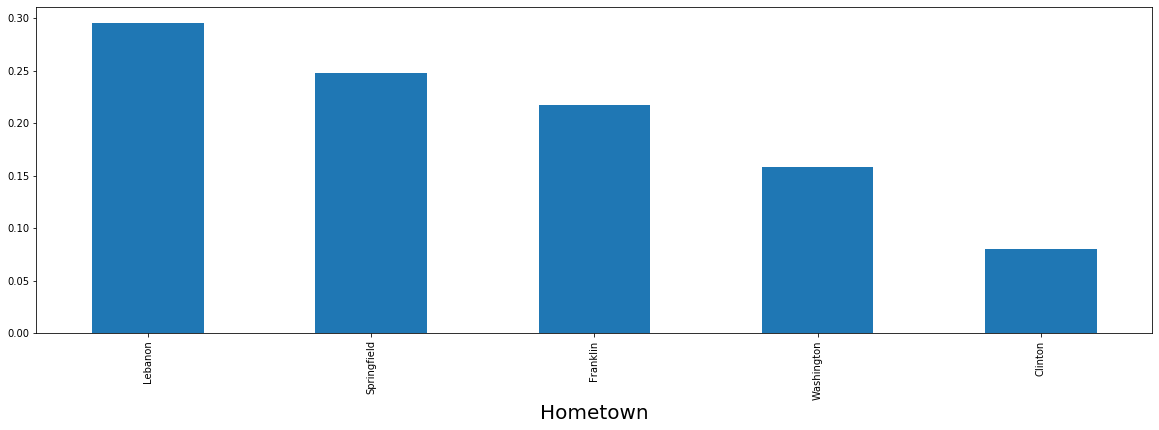

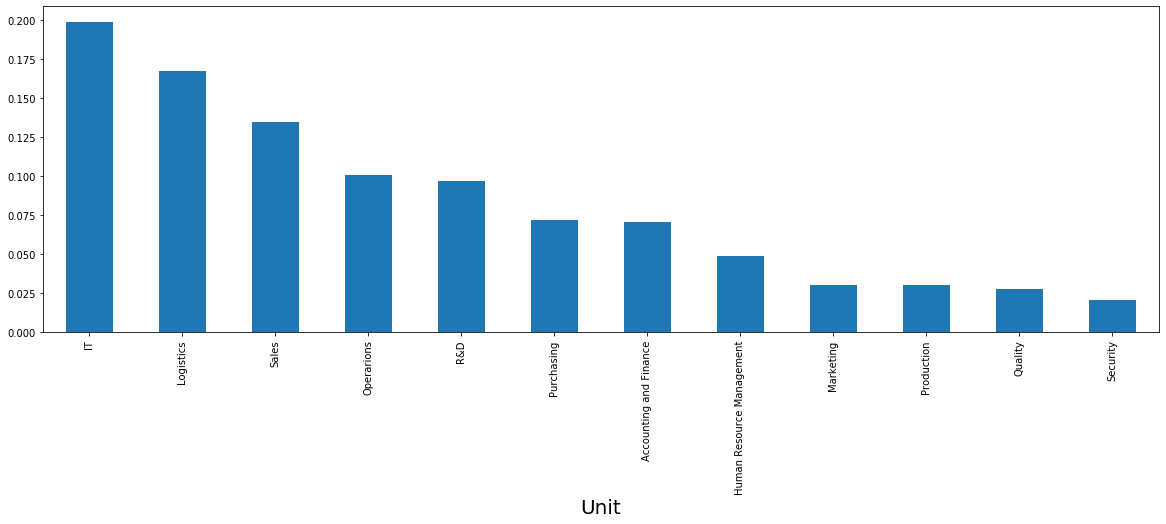

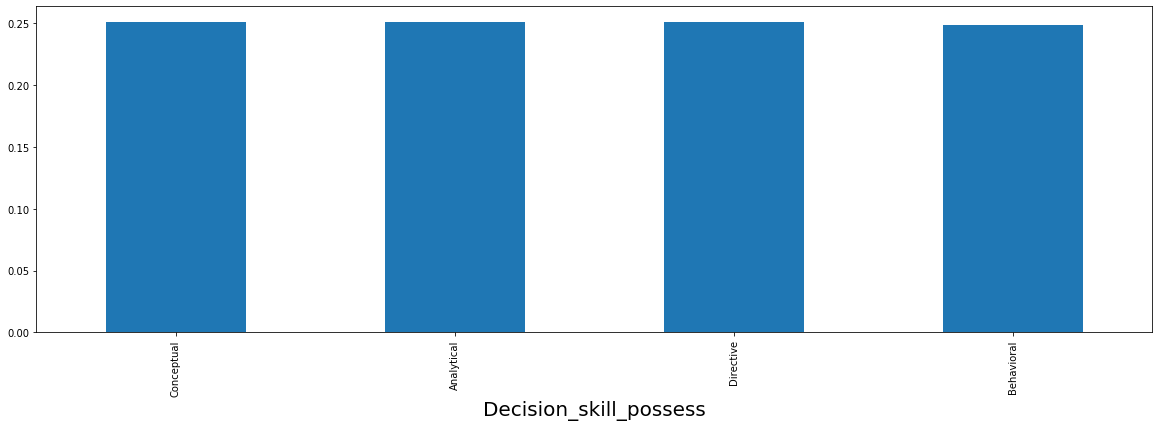

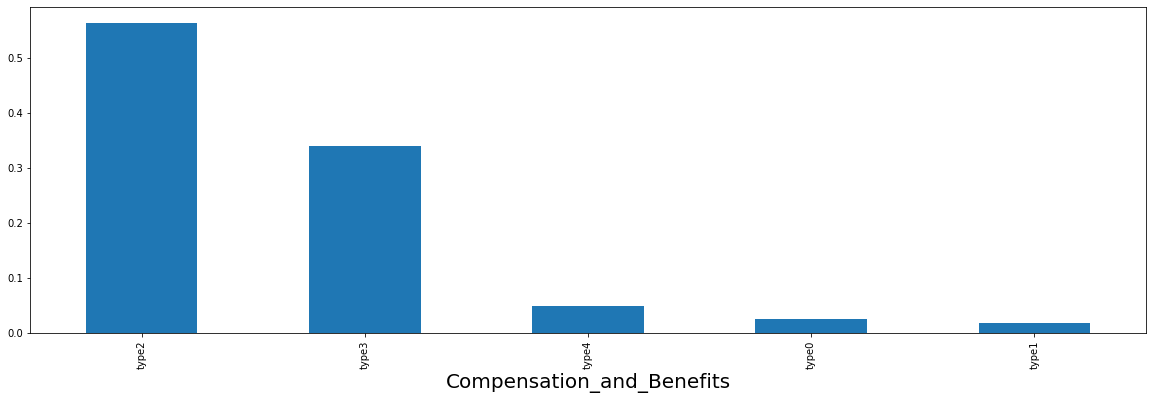

In [70]:
# Univariate analysis on Categorical data
def plot_categorical_columns(df):
    categorical_data = categorical(df)
    categorical_data = categorical_data.drop('Employee_ID')
    df = df[categorical_data]
    for i in df:
        plt.figure(figsize=(20,6))
        plt.xlabel(i,fontsize=20)
        df[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()
plot_categorical_columns(X)

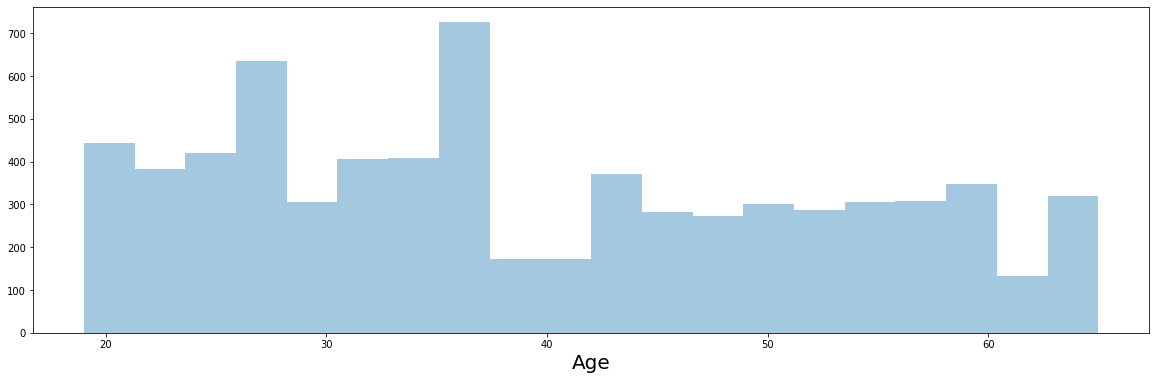

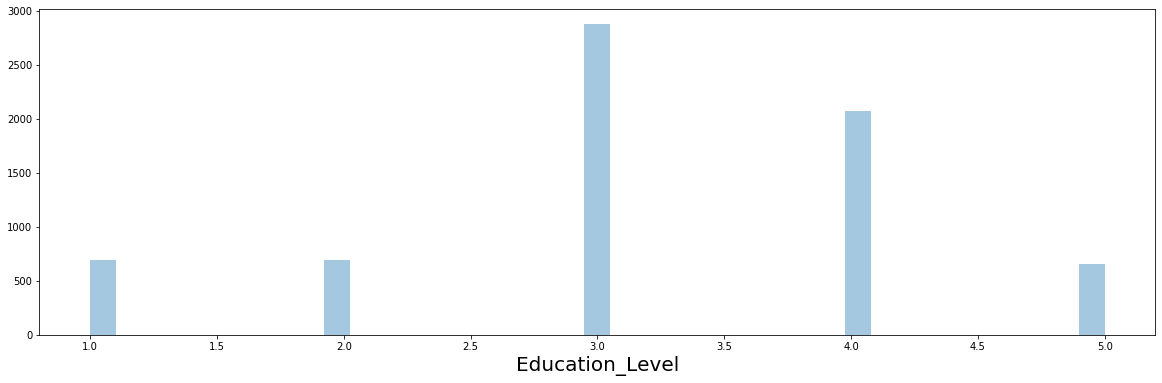

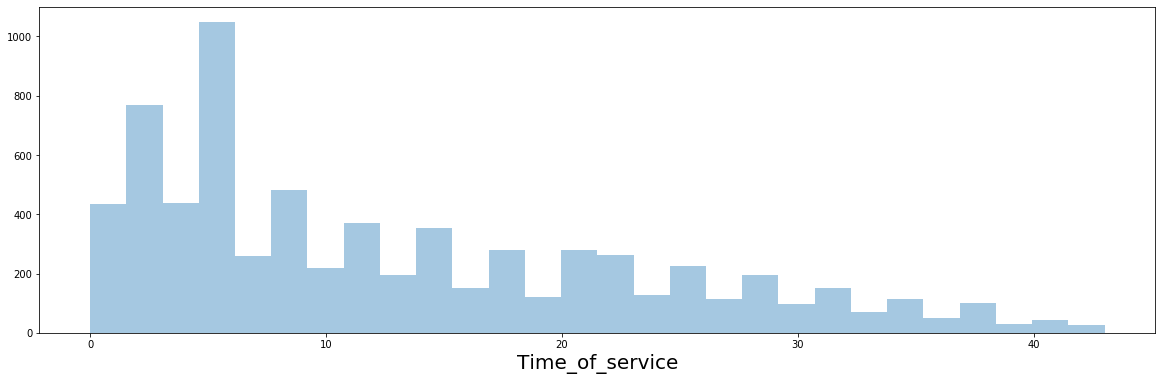

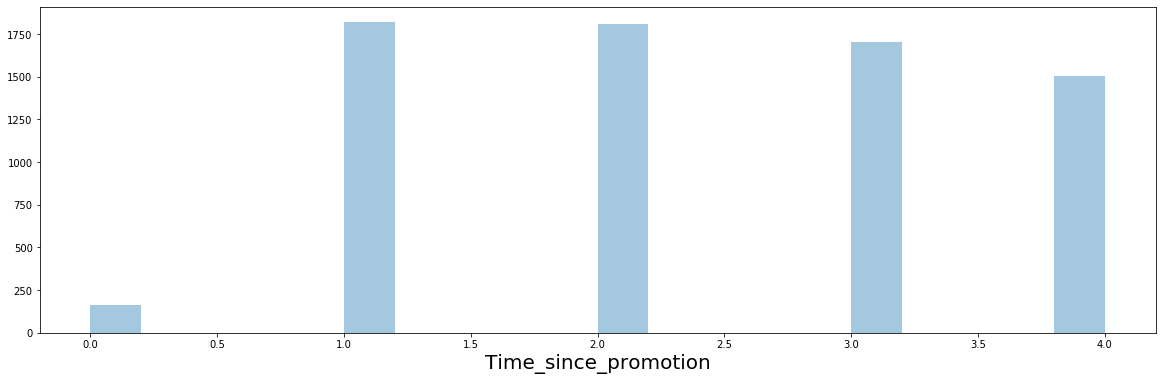

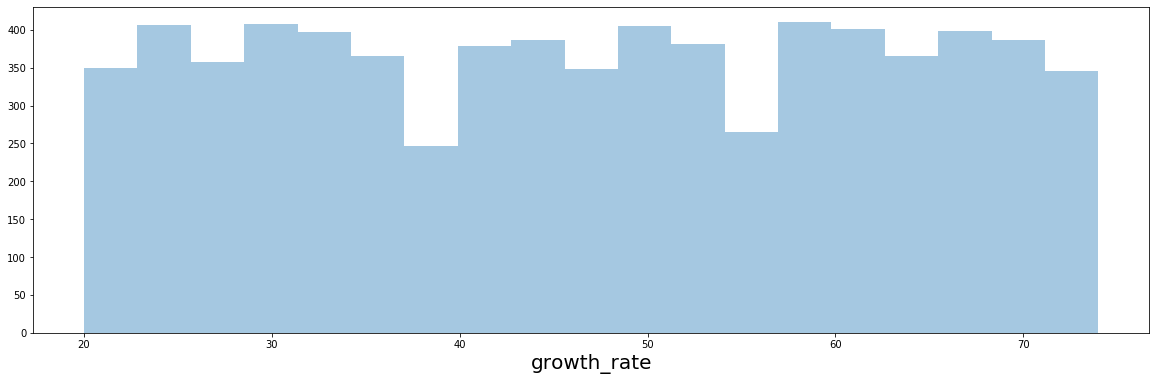

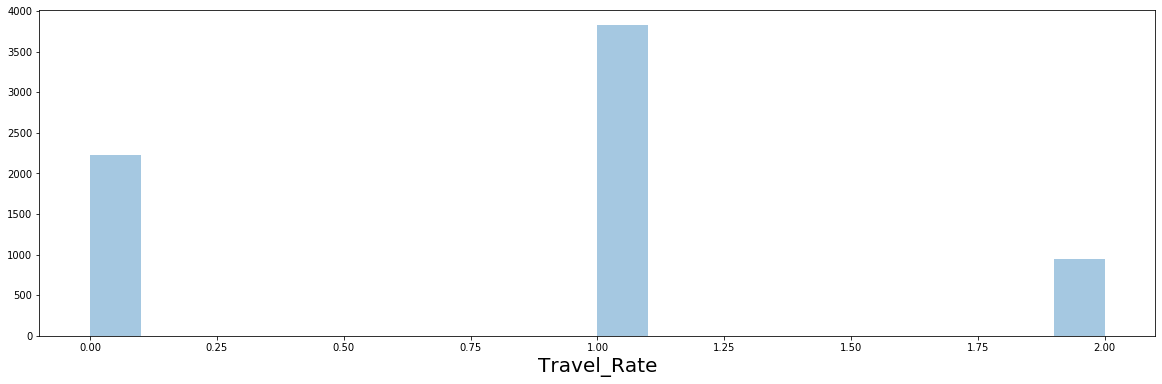

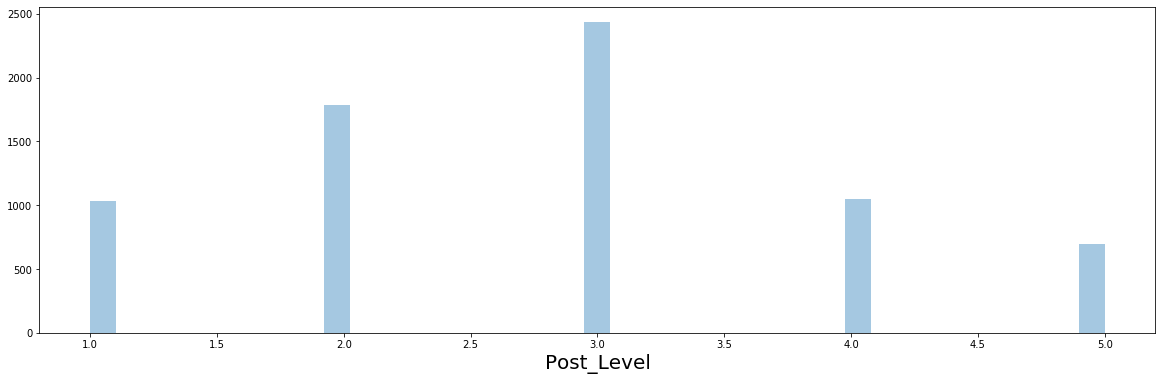

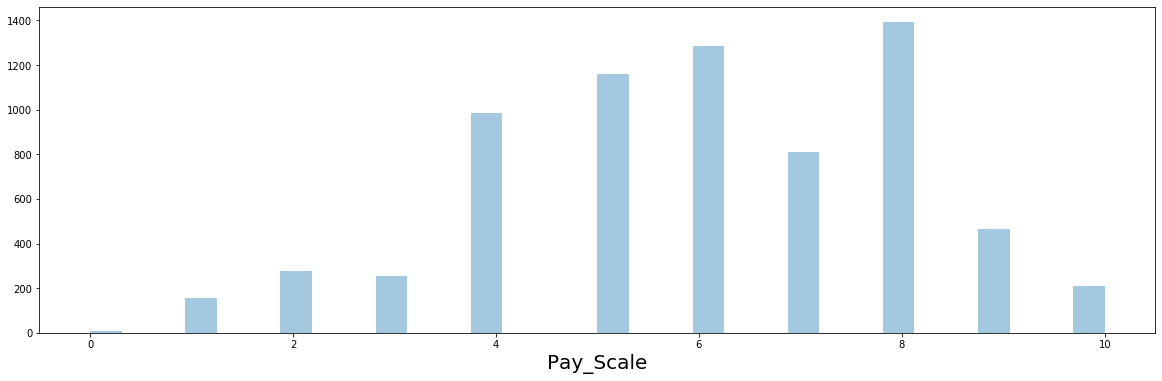

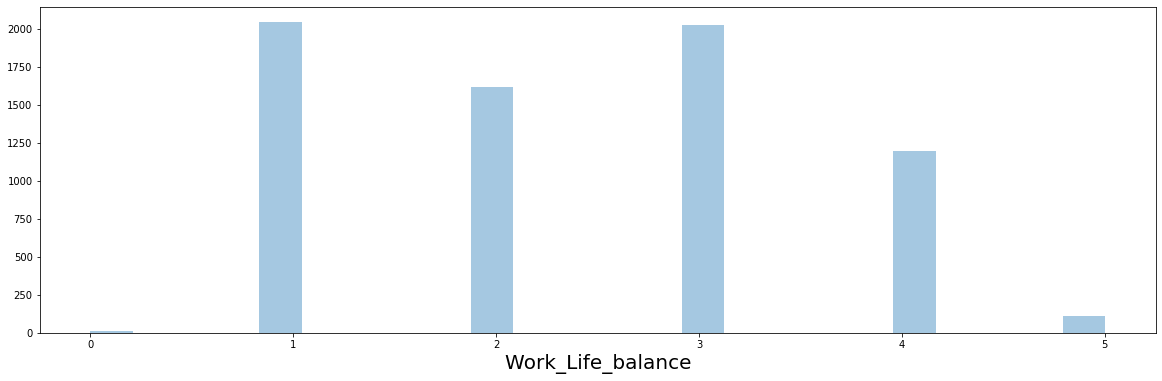

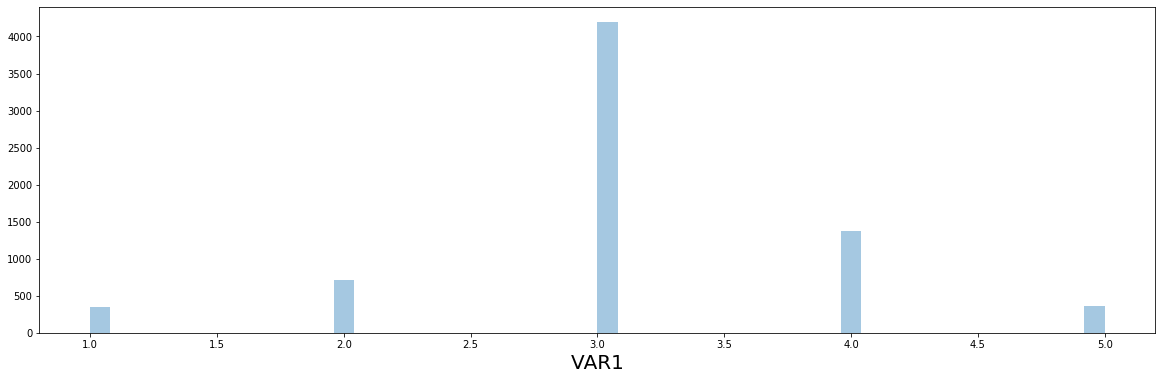

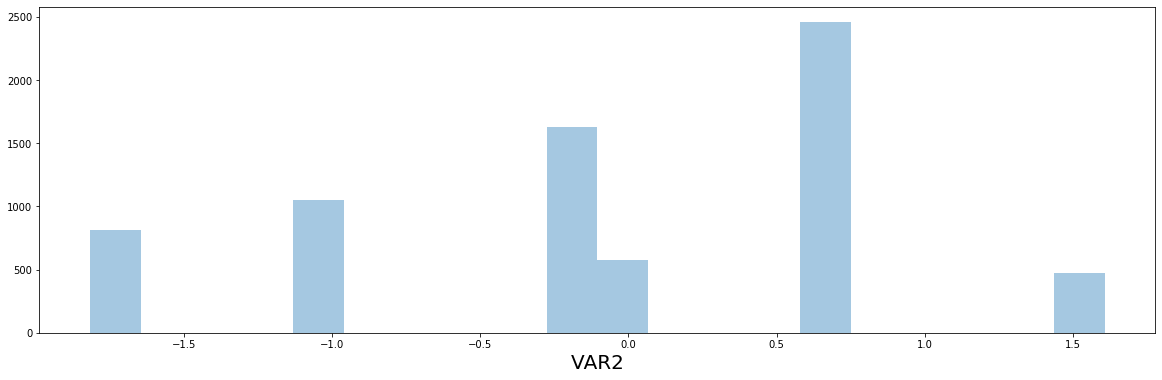

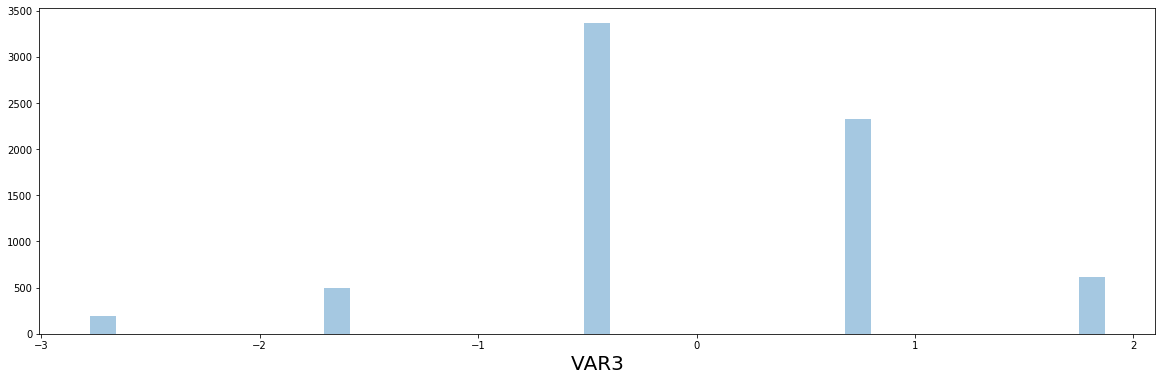

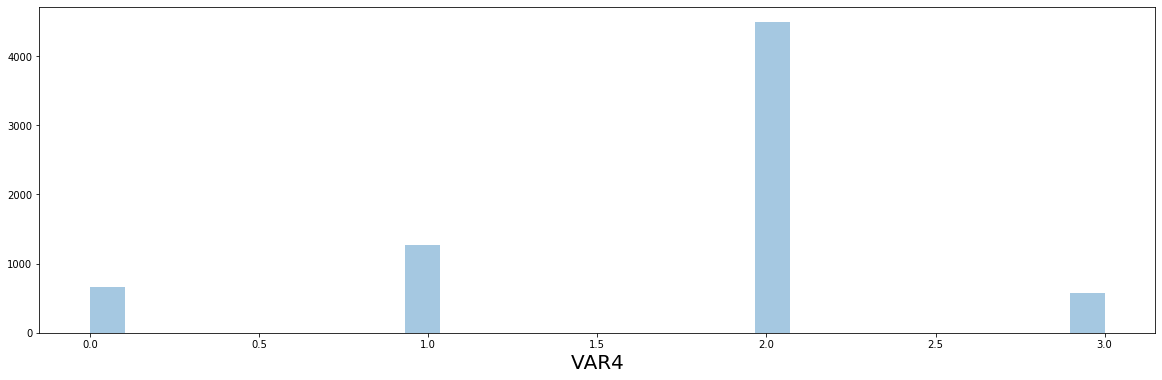

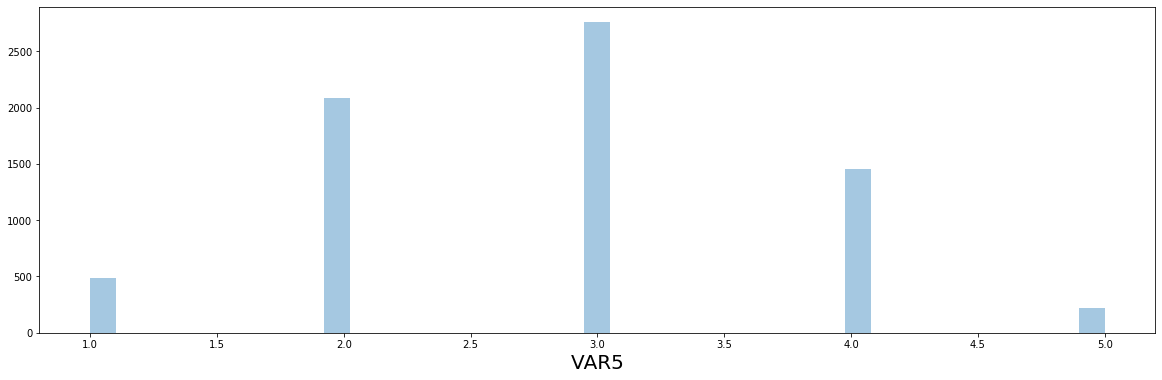

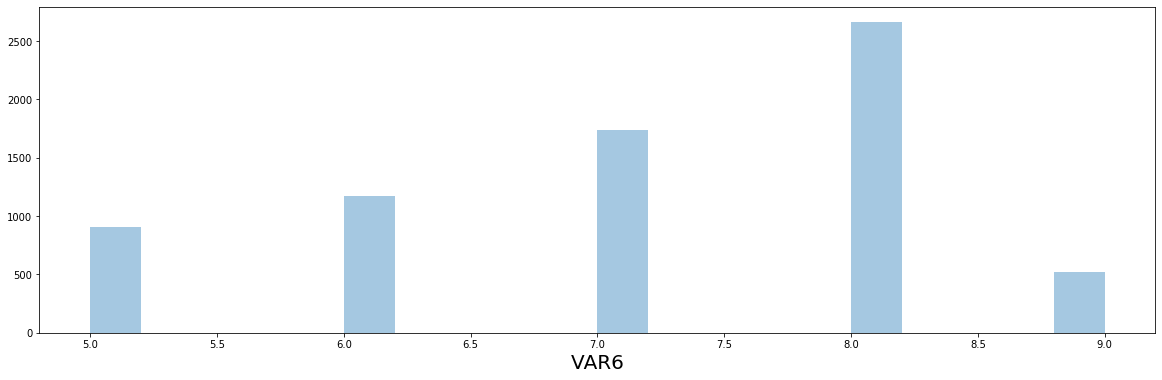

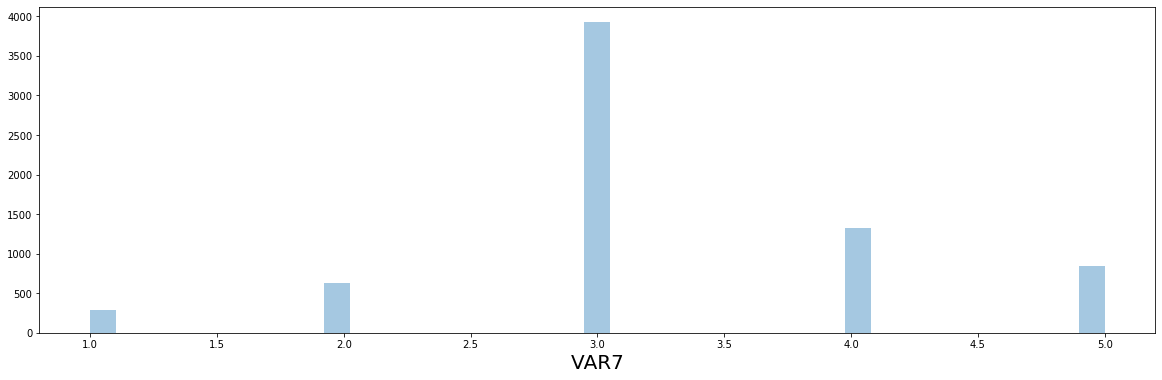

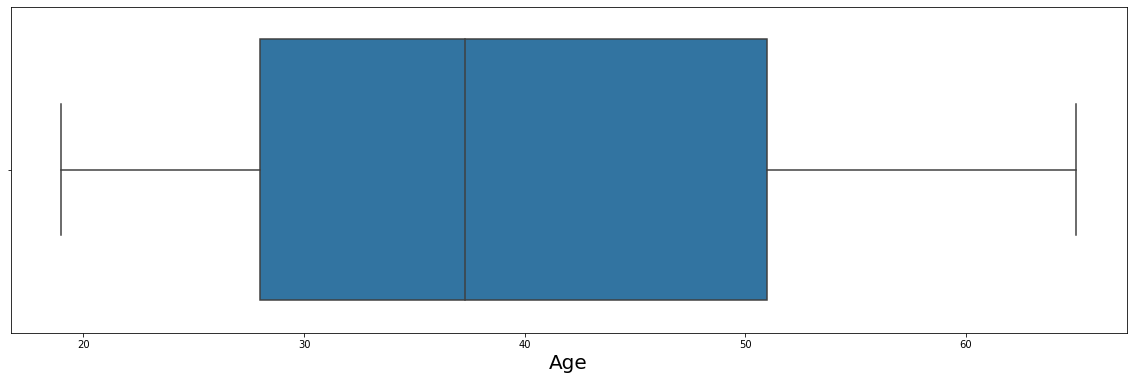

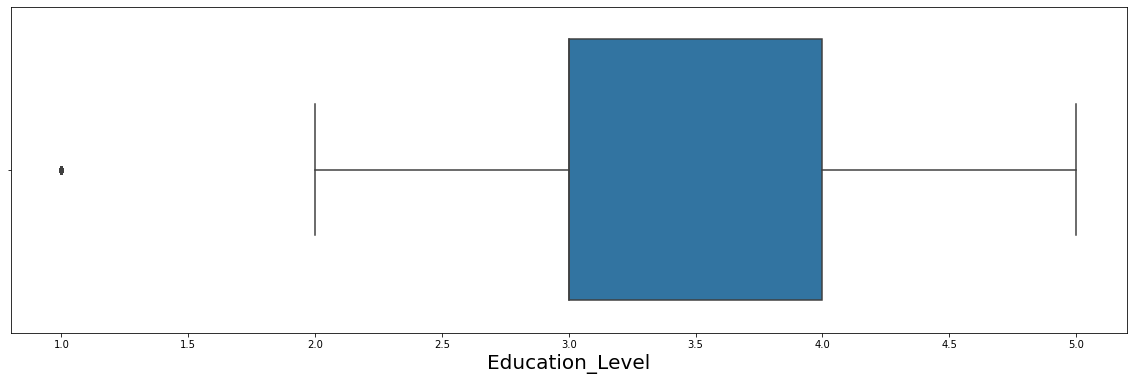

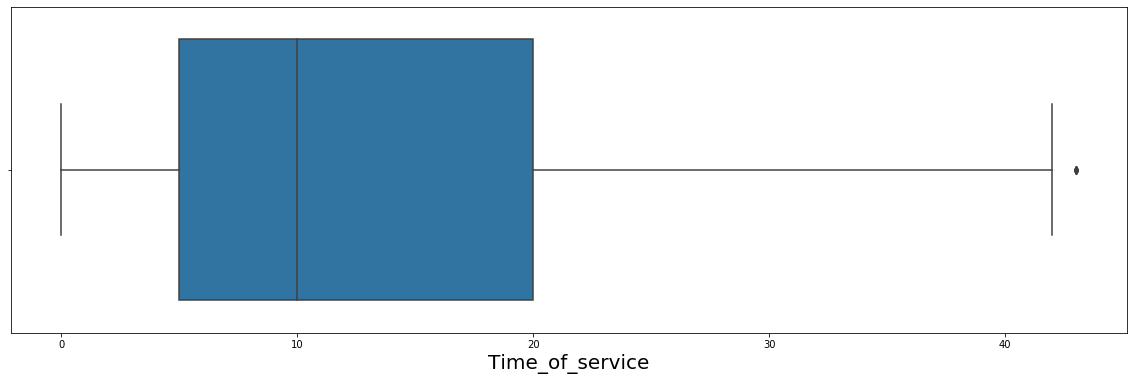

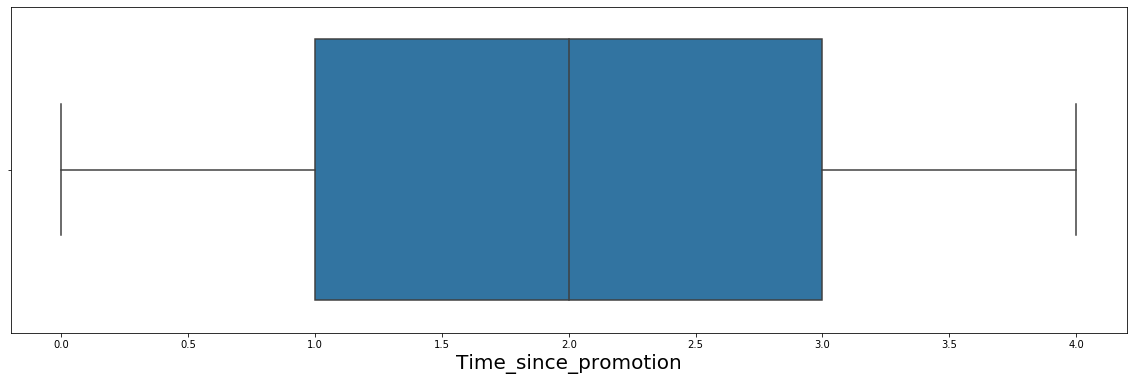

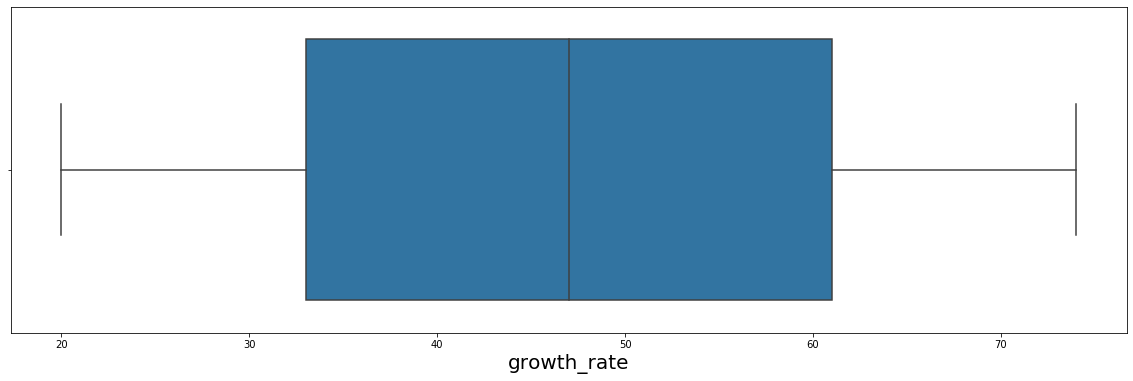

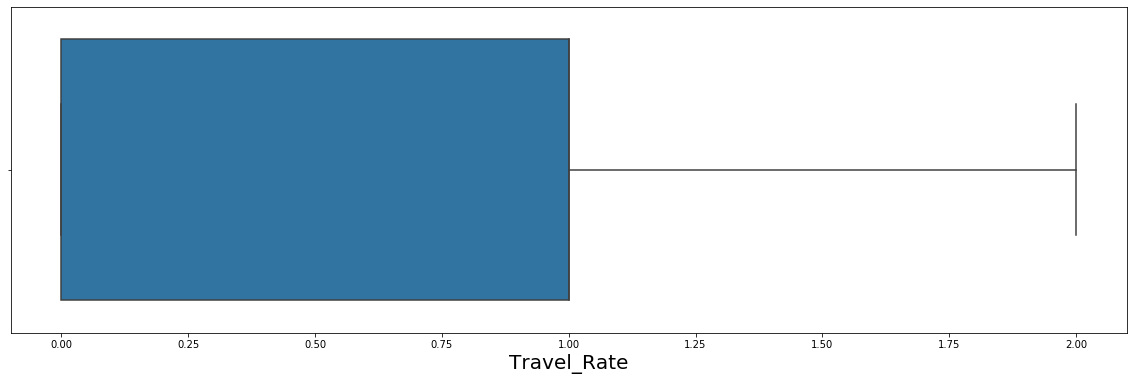

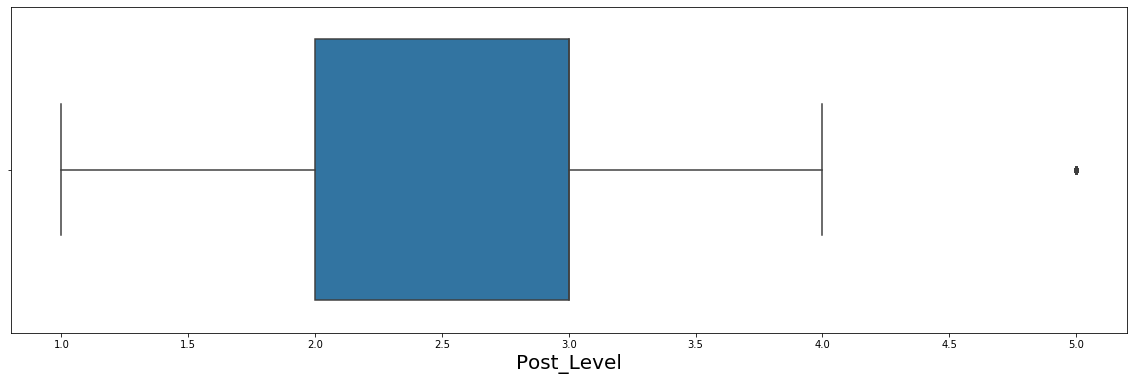

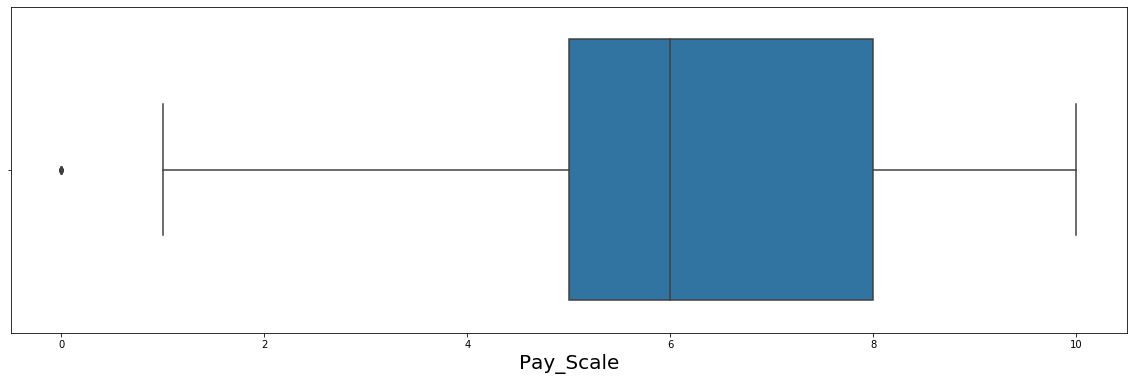

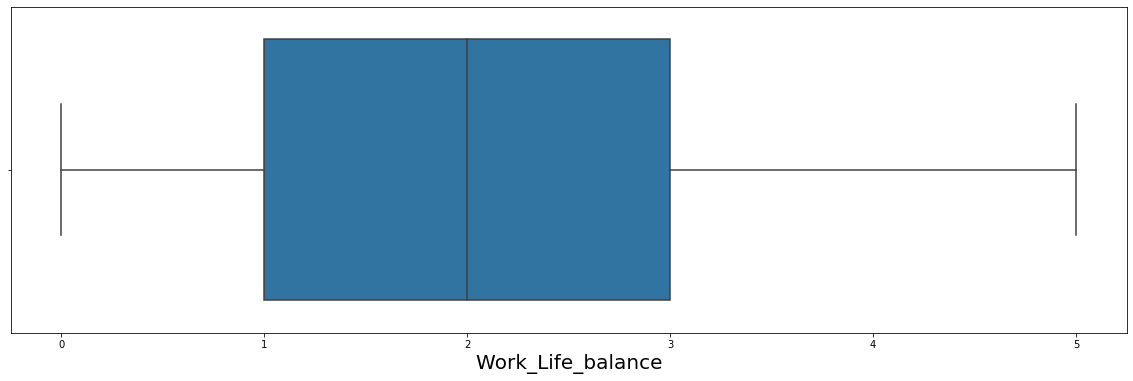

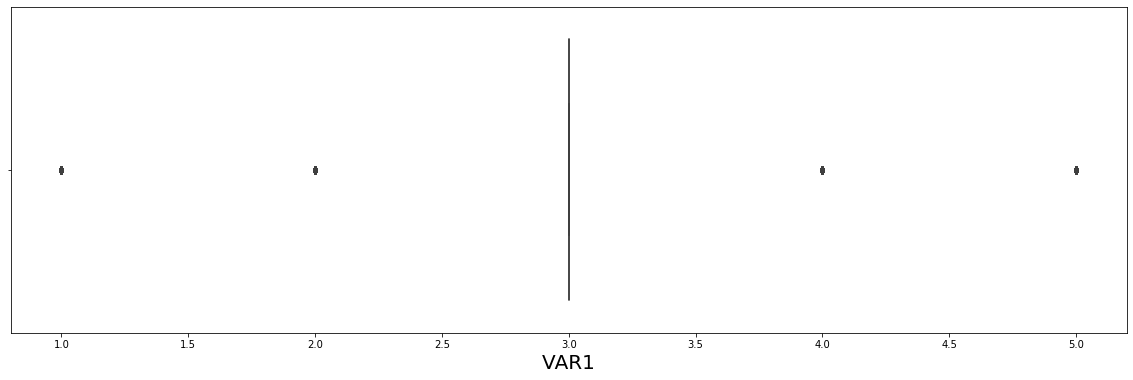

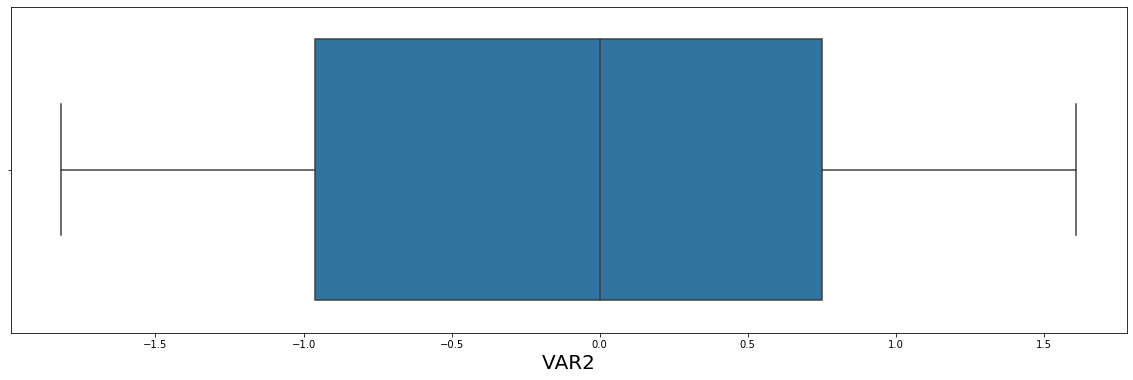

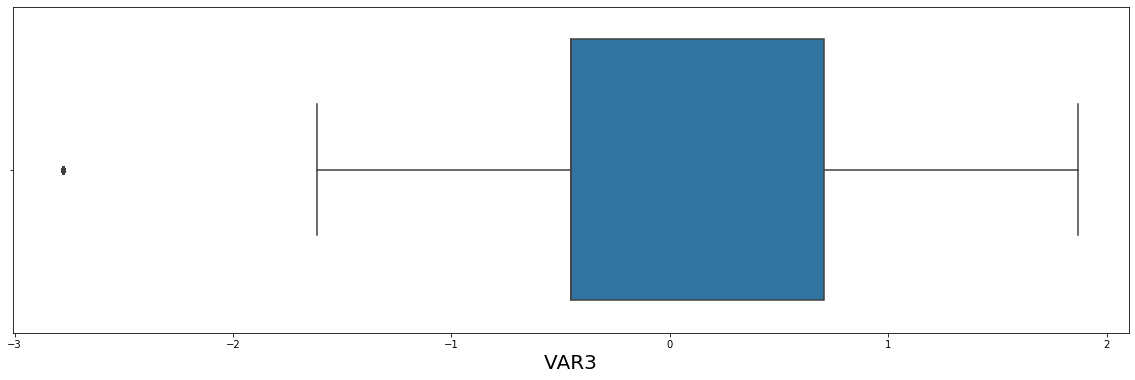

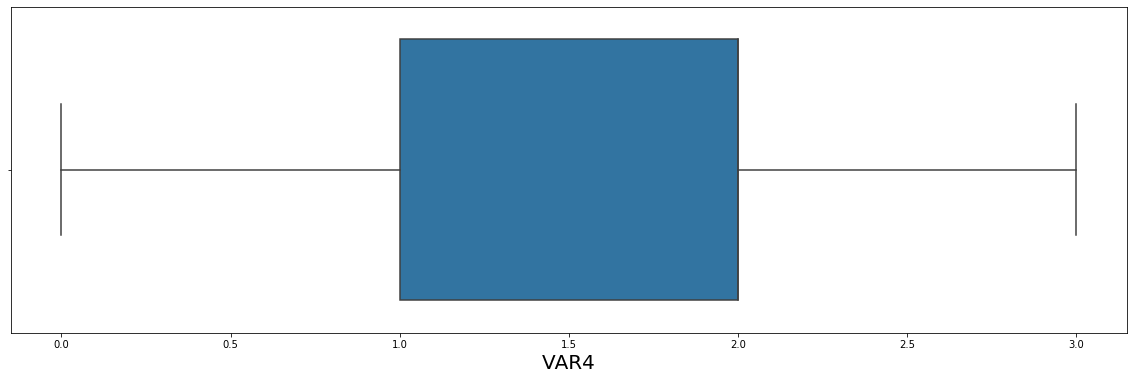

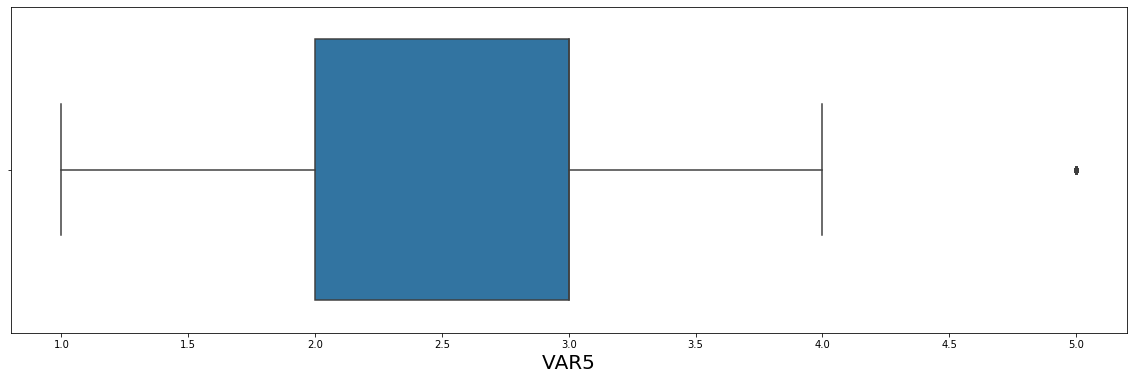

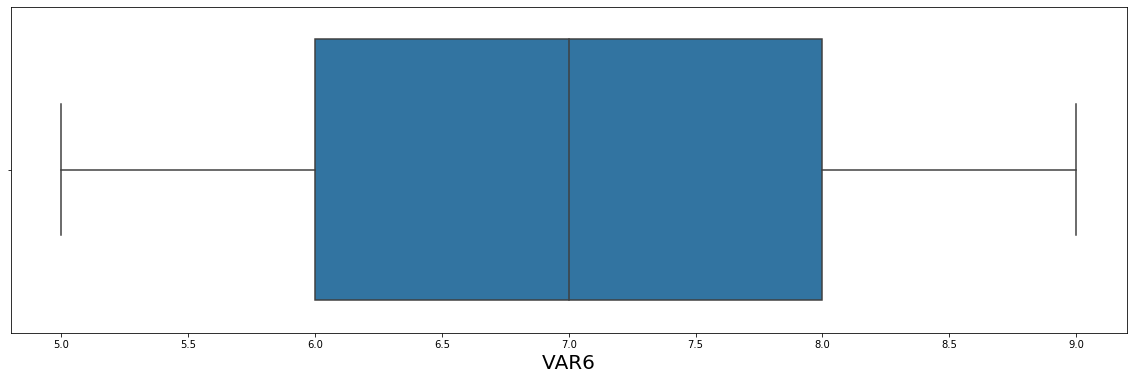

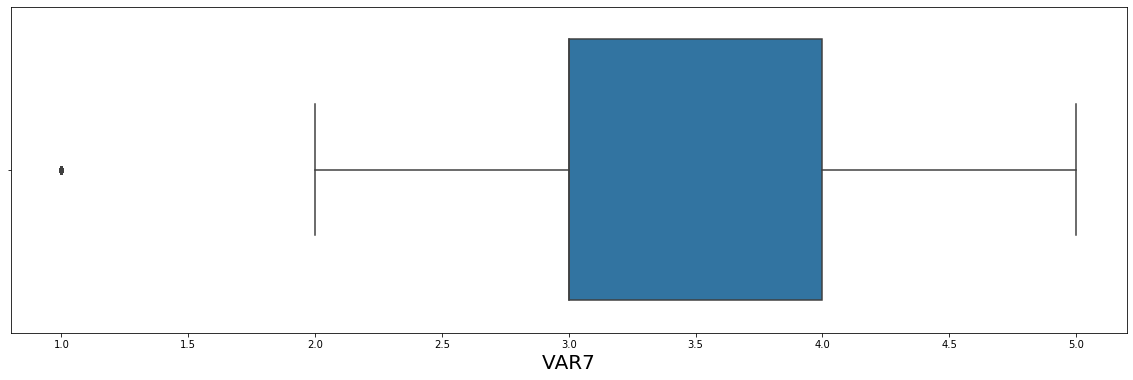

In [71]:
# Univariate Analysis on continuous columns
# Plot Histograms
def plot_continuous_columns(df):
    numeric_cols = numeric(df)
    df = df[numeric_cols]
    for i in range(0,len(numeric_cols)):
        plt.figure(figsize = (20,6))
        sns.distplot(df[numeric_cols[i]],kde=False)
        plt.xlabel(numeric_cols[i],fontsize=20)
        plt.show()
#Plot BoxPlots
def plot_box_plots(df):
    numeric_cols = numeric(df)
    df = df[numeric_cols]
    for i in range(0,len(numeric_cols)):
        plt.figure(figsize = (20,6))
        sns.boxplot(df[numeric_cols[i]])
        plt.xlabel(numeric_cols[i],fontsize=20)
        plt.show()
plot_continuous_columns(X)
plot_box_plots(X)

In [72]:
# Detect outliers in continuous columns
def detect_outliers(df):
    cols = list(df)
    for col in cols:
        if col in numeric(df):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - 1.5*iqr
            fence_high = q3 +1.5*iqr
            print(col + ' -- ', "Outliers count: ", df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0],"fence low : ",fence_low,"fence high : ",fence_high)
detect_outliers(X)
# Outliers are not treated as they seem to be genuine outliers which would impact the data speculations

Age --  Outliers count:  0 fence low :  -6.5 fence high :  85.5
Education_Level --  Outliers count:  695 fence low :  1.5 fence high :  5.5
Time_of_service --  Outliers count:  8 fence low :  -17.5 fence high :  42.5
Time_since_promotion --  Outliers count:  0 fence low :  -2.0 fence high :  6.0
growth_rate --  Outliers count:  0 fence low :  -9.0 fence high :  103.0
Travel_Rate --  Outliers count:  0 fence low :  -1.5 fence high :  2.5
Post_Level --  Outliers count:  698 fence low :  0.5 fence high :  4.5
Pay_Scale --  Outliers count:  9 fence low :  0.5 fence high :  12.5
Work_Life_balance --  Outliers count:  0 fence low :  -2.0 fence high :  6.0
VAR1 --  Outliers count:  2807 fence low :  3.0 fence high :  3.0
VAR2 --  Outliers count:  0 fence low :  -3.5304 fence high :  3.3208
VAR3 --  Outliers count:  198 fence low :  -2.1955 fence high :  2.4493
VAR4 --  Outliers count:  0 fence low :  -0.5 fence high :  3.5
VAR5 --  Outliers count:  222 fence low :  0.5 fence high :  4.5
VAR6 

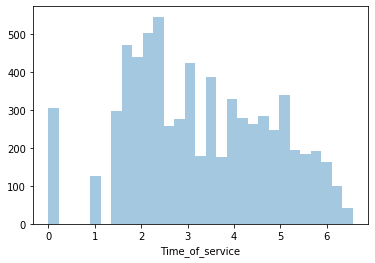

In [73]:
#Taking care of TIme of service variable as it is right skewed
sns.distplot(np.sqrt(X['Time_of_service']),kde=False)
X['Time_of_service'] = np.sqrt(X['Time_of_service'])
#Removing growth rate column as most of the values are same
#data.drop(['growth_rate'],axis=1,inplace=True)

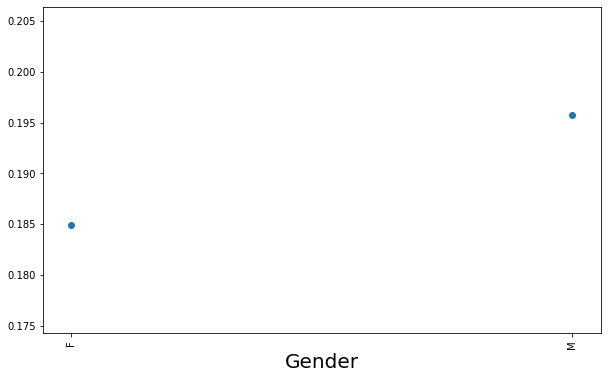

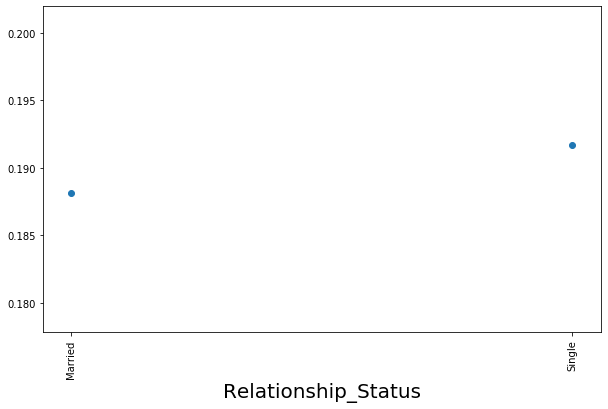

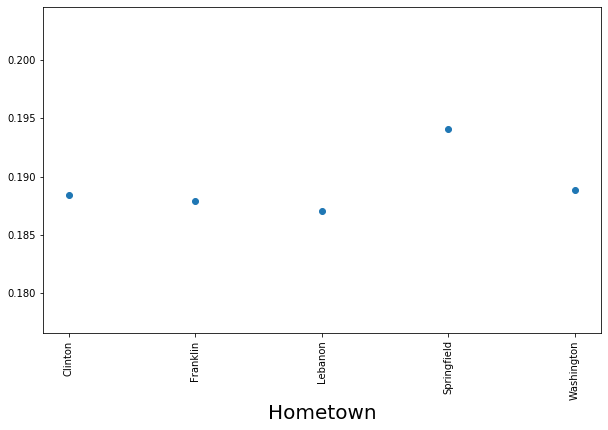

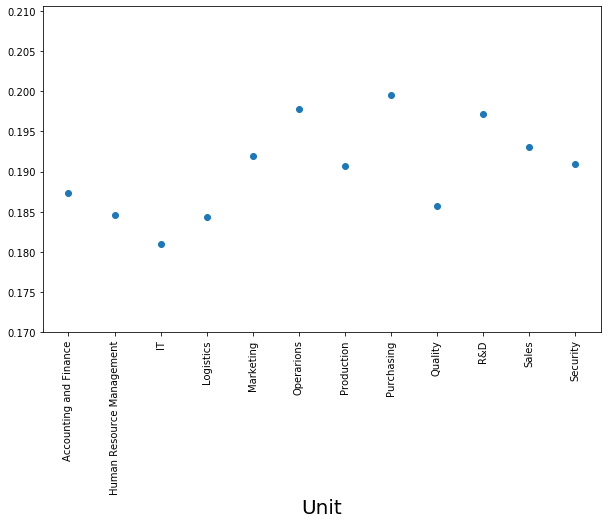

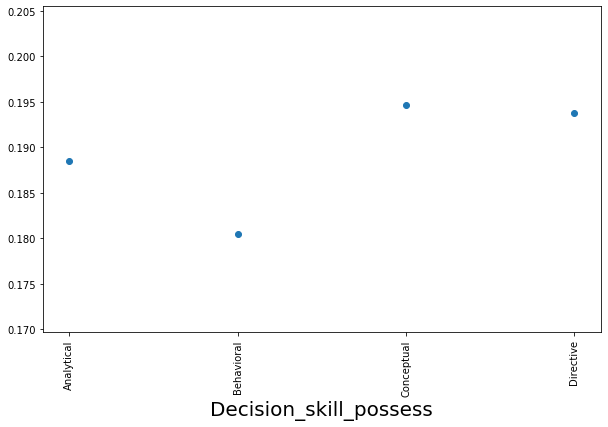

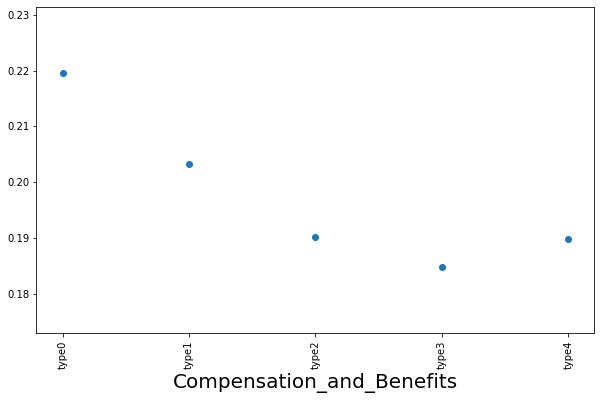

In [74]:
# Bivariate Analysis on categorical columns
data_df = X.copy()
data_df['Attrition_rate'] = y.values
def bivariate_analysis_categorical(df):
    cols = categorical(df)
    cols = cols.drop('Employee_ID')
    for col in cols:
        if col in categorical(df):
            plt.figure(figsize= (10,6))
            df_grouped = df.groupby(col)[['Attrition_rate']].mean()
            plt.scatter(df_grouped.index,df_grouped['Attrition_rate'])
            plt.xlabel(col,fontsize=20)
            plt.xticks(rotation='vertical')
            plt.show()
bivariate_analysis_categorical(data_df)
# Male employees tend to have a greater attrition rate compared to Female employees
# Single employees tend to have greater chance of leaving the company compared to married employees
# All area employees have almost same avg attrition rate but Springfield employees have a greater attrition rate
# Least avg attrition is observed with IT unit
# type3 and type4 compensation and benefits employees have the least attrition rate

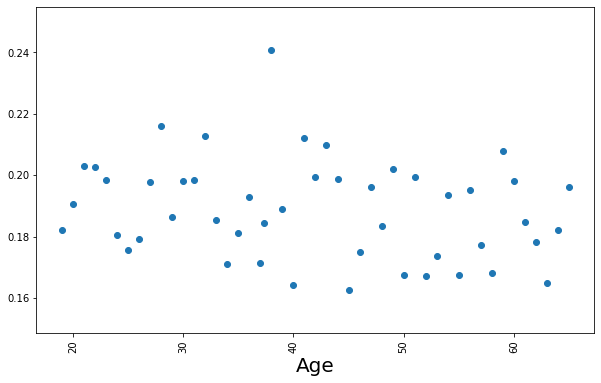

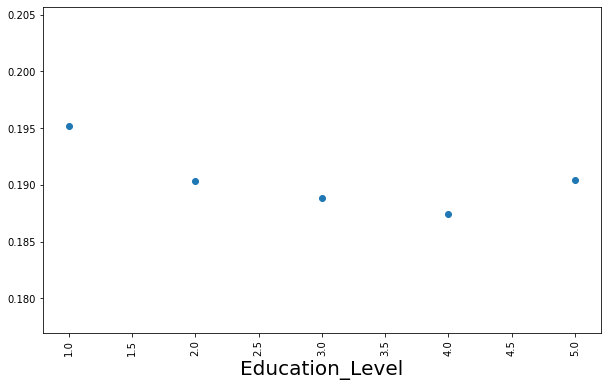

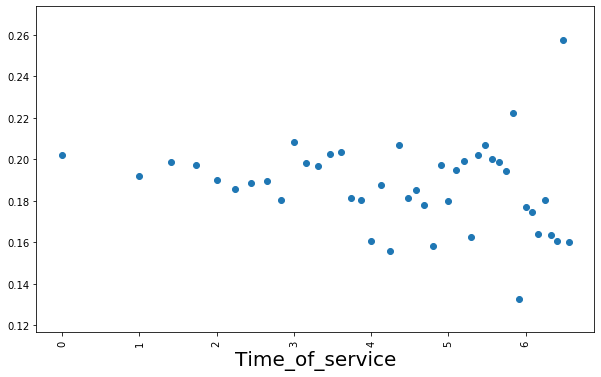

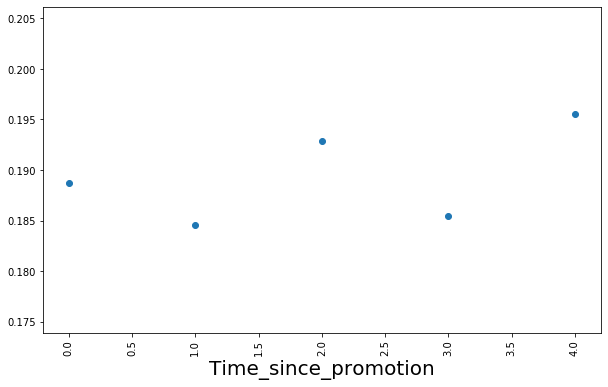

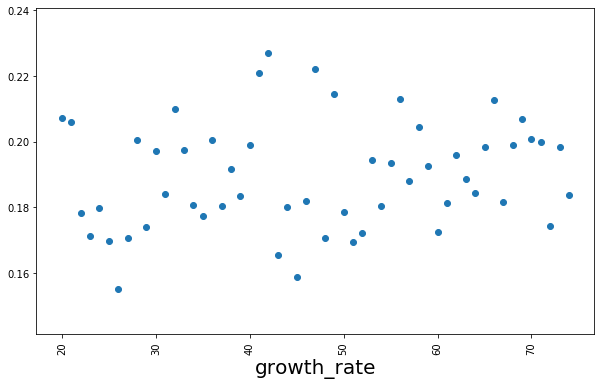

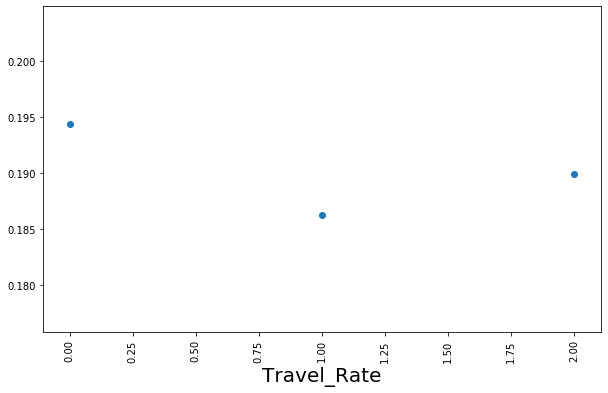

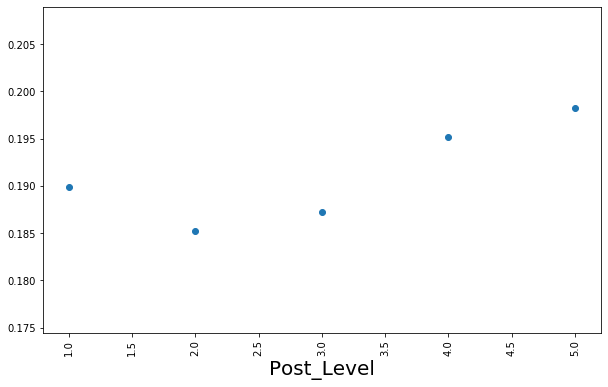

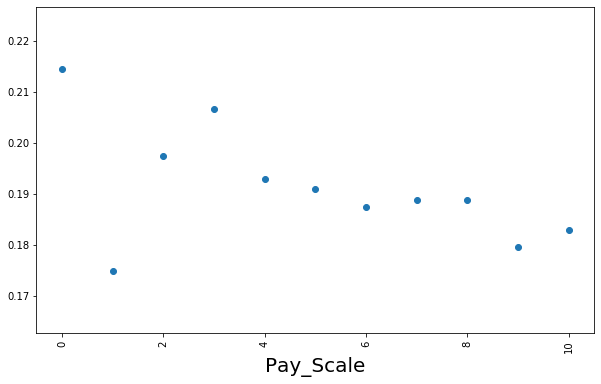

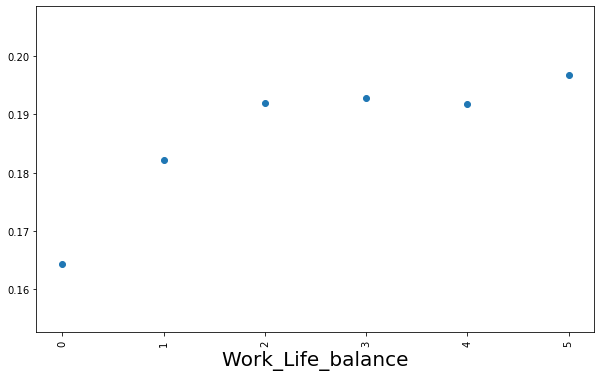

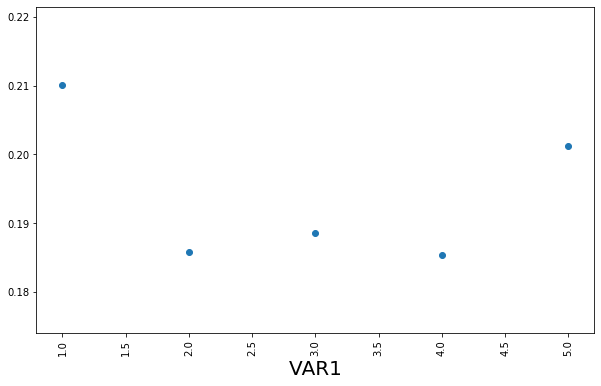

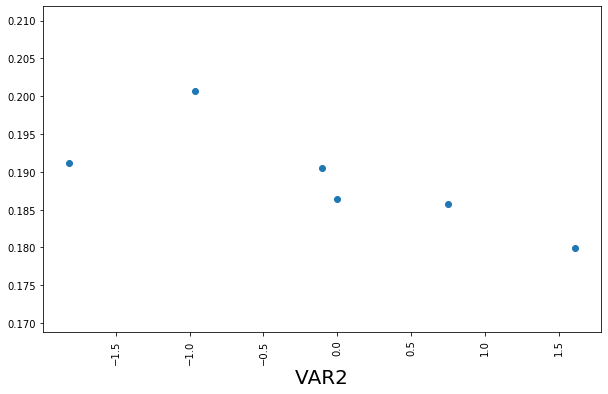

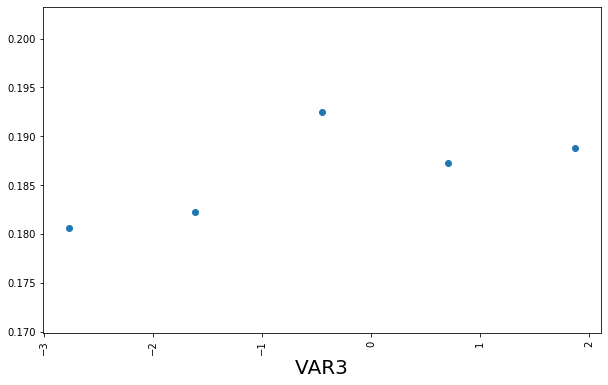

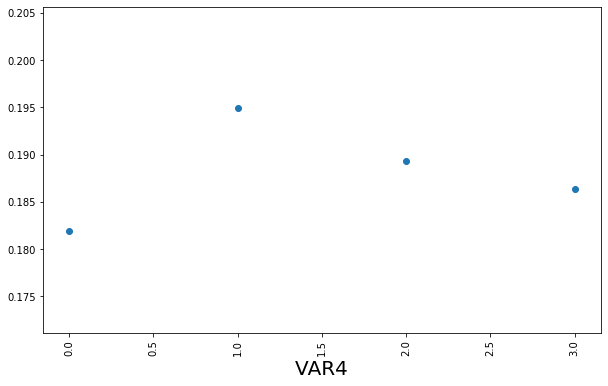

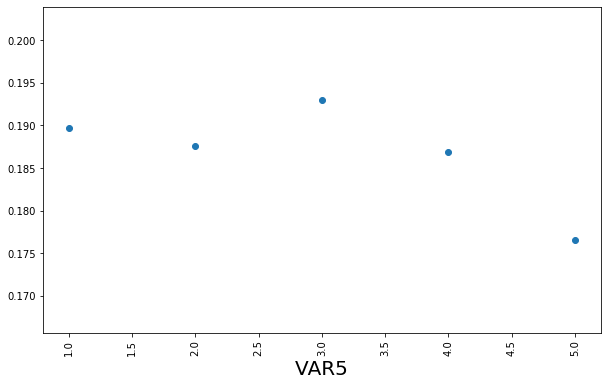

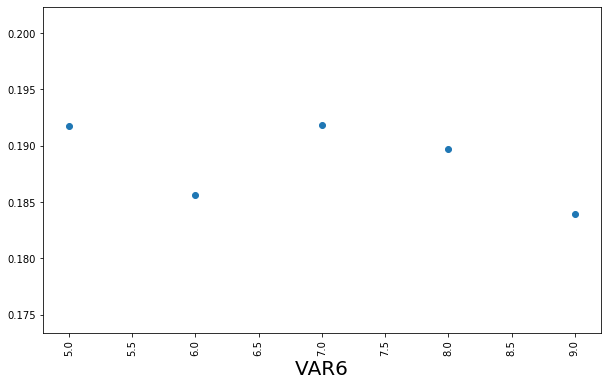

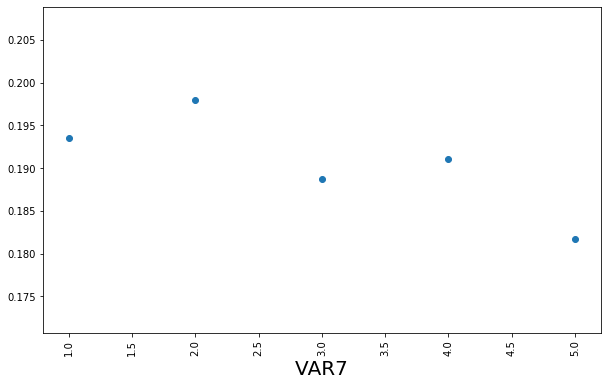

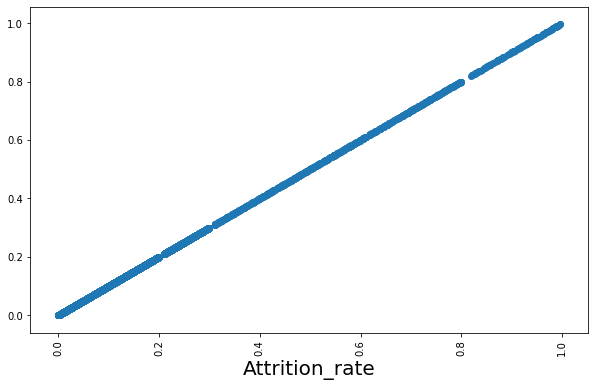

In [75]:
# Bivariate Analysis on numerical columns
data_df = X.copy()
data_df['Attrition_rate'] = y.values
def bivariate_analysis_numerical(df):
    cols = numeric(df)
    for col in cols:
        if col in numeric(df):
            plt.figure(figsize= (10,6))
            df_grouped = df.groupby(col)[['Attrition_rate']].mean()
            plt.scatter(df_grouped.index,df_grouped['Attrition_rate'])
            #plt.scatter(df[col],df['Attrition_rate'])
            plt.xlabel(col,fontsize=20)
            plt.xticks(rotation='vertical')
            plt.show()
bivariate_analysis_numerical(data_df)

# As the Education level increased the attrition value is decreasing
#As the time of service is increasing the attrition rate is decreasing
# As the time since the employee being promoted is more, the attrition value is more i.e. more chances of employee leaving the company
# People who tend to not travel seem to have a greater avg attrition rate
# Higher the post level greater is the attrition value
# As the payscale increased the attrition value is decreasing i.e. the higher paid employess have lesser risk of moving out of the company
# People who are able to balance their work and life are more interested in moving out of the company


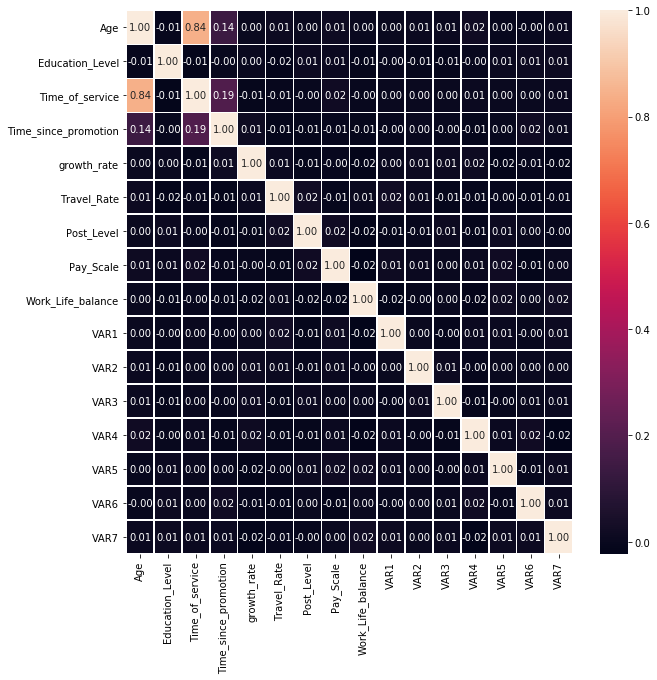

In [76]:
# Correlation heatmap of the data
data_corr = X[numeric(X)].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_corr,annot=True,fmt=".2f",linewidths=.5,ax=ax)

Since the correlation between Age and Time of service coulmns is more than 50%, we have to drop one of the columns to follow the multi colinearity feature of regression. Dropping the Age column as it had more missing values compared to time of service column.

In [77]:
X.drop(['Age'],axis = 1,inplace = True)
X.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,23371,F,4,Married,Franklin,IT,Conceptual,2.000000,4,33,...,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,18000,M,3,Single,Springfield,Logistics,Analytical,2.236068,4,36,...,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,3891,F,3,Married,Clinton,Quality,Conceptual,5.196152,3,51,...,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,17492,F,3,Single,Lebanon,Human Resource Management,Behavioral,2.000000,3,56,...,8.0,type2,1.0,3,-1.8176,-0.4537,0.0,3,7,3
4,22534,F,1,Married,Springfield,Logistics,Conceptual,2.236068,4,62,...,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [78]:
#y = np.sqrt(y)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
# Encoding the Categorical Columns
#def Label_Encoder(test_df):
    #Label Encoding
cat_cols = categorical(X_train)
cat_cols = cat_cols.drop('Employee_ID')
le = LabelEncoder()
for i in cat_cols:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
#Label_Encoder(X_test)   
X_train.head()
X_test.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
4365,7666,1,4,1,3,5,3,3.605551,3,43,...,5.0,2,3.0,3,-0.1048,0.7075,2.0,2,5,5
2621,17092,0,3,1,2,11,3,2.236068,1,37,...,5.0,2,3.0,3,-0.1048,0.7075,2.0,2,9,3
5215,22146,1,3,1,4,4,0,2.645751,3,66,...,8.0,2,3.0,3,-0.1048,1.8688,2.0,5,6,3
1947,8312,1,2,0,1,2,1,3.872983,1,34,...,8.0,2,2.0,3,-1.8176,-2.7762,1.0,4,6,4
1394,25338,1,4,1,2,2,3,5.567764,3,32,...,7.0,4,1.0,5,-0.9612,-1.6150,2.0,3,7,3


In [80]:
#test = SelectKBest(score_func = f_regression,k=21)
#X_train = test.fit_transform(X_train,y_train)
#X_test = test.transform(X_test)
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(lr_pred,y_test))
#print((lasso.coef_==0).sum())
lr_score = lr.score(X_test,y_test)
print("lr_rmse : ",lr_rmse)
score = 100*max(0,1-lr_rmse)
print(score)

lasso=Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y_test))
#print((lasso.coef_==0).sum())
print("lasso_rmse : ",lasso_rmse)

ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred,y_test))
ridge_score = ridge.score(X_test,y_test)
print("ridge_rmse : ",ridge_rmse)
#82.373 - without employee_ID
#82.37785465381965 - sqrt OF TIME OF SERVICE

lr_rmse :  0.17622145346180337
82.37785465381965
lasso_rmse :  0.1763214260596556
ridge_rmse :  0.17622146476812398


In [117]:
lasso_lambdas = [0.0001,0.0002,0.00025,0.0003]
                 #0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
lasso_model = Lasso()
lasso_grid = GridSearchCV(estimator = lasso_model,param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)
lasso_pred = lasso_grid.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y_test))
print(lasso_rmse)
score = 100*max(0,1-lasso_rmse)
print(score)
#0.18225811331093572
#0.1820950454783188
#0.18209481720174653

0.17620260962350626
82.37973903764937


In [126]:
pca_components = [10,12,15,18,19,20,21]
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#pca_grid = GridSearchCV(estimator = PCA,param_grid=dict(n_components=pca_components))
pca = PCA(n_components=21,random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#model = LinearRegression()
#model.fit(X_train_pca,y_train)
#model_pred = model.predict(X_test_pca)
lasso_grid.fit(X_train_pca,y_train)
lasso_pca_pred = lasso_grid.predict(X_test_pca)
lasso_pca_rmse = np.sqrt(mean_squared_error(lasso_pca_pred,y_test))
print(pca_rmse)
lasso_pca_r2 = r2_score(y_test,lasso_pca_pred)
print(lasso_pca_r2)
score = 100*max(0,1-lasso_pca_rmse)
print(score)
#82.3850866323237 - sqrt of time of service
#82.38561024058104

0.176149133676763
0.0005736360724566403
82.38577193715204


In [119]:
score = cross_val_score(lr,X_train,y_train, cv=10)
mean_score = score.mean()
print(mean_score)

-0.002613173063715912


In [120]:
rfe = RFE(estimator = lr, n_features_to_select = 14, step=1)
rfe.fit(X_train,y_train)
rfe_pred = rfe.predict(X_test)
rfe_rmse = np.sqrt(mean_squared_error(rfe_pred,y_test))
print(rfe_rmse)
score = 100*max(0,1-rfe_rmse)
print(score)
print(rfe.ranking_)

0.17621508231023478
82.37849176897653
[9 1 1 1 4 1 1 1 1 6 1 1 1 1 1 5 1 3 2 7 8 1]


In [121]:
model_poly = make_pipeline(PolynomialFeatures(1),LinearRegression())
model_poly.fit(X_train,y_train)
model_poly_predict = model_poly.predict(X_test)
model_poly_rmse = np.sqrt(mean_squared_error(model_poly_predict,y_test))
print(model_poly_rmse)
score = 100*max(0,1-model_poly_rmse)
print(score)

0.17622145346180335
82.37785465381965


In [122]:
test_data = pd.read_csv(r'C:\Users\bhasy\Downloads\Dataset\test.csv')
Employee_ID = test_data['Employee_ID']
test_data.fillna(0,inplace=True)
test_data['Employee_ID'] = test_data['Employee_ID'].str.split('_',expand=True)[1]
test_data['Time_of_service'] = np.sqrt(test_data['Time_of_service'])
test_data.drop(['Age'],axis=1,inplace=True)
#test_data.drop(['Employee_ID'],axis=1,inplace=True)
#test_data['Time_of_service'] = np.sqrt(test_data['Time_of_service'])
#Removing growth rate column as most of the values are same
#test_data.drop(['growth_rate'],axis=1,inplace=True)

In [123]:
#Label encoding test data
for i in cat_cols:
    X[i] = le.fit_transform(X[i])
    test_data[i] = le.transform(test_data[i])
test_data.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,22713,0,5,1,3,9,2,2.645751,4,30,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,9658,1,2,1,2,2,3,6.403124,2,72,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,22203,1,3,0,3,10,3,4.582576,3,25,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,7652,1,5,1,4,4,0,3.316625,4,28,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,6516,0,3,0,1,9,2,3.464102,4,47,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [127]:
test_data_pca = pca.transform(test_data)
#lasso_final_pred = lasso_grid.predict(test_data)
lasso_grid_final_pred = lasso_grid.predict(test_data_pca)
#lasso_final_pred = lasso_grid.predict(test_data)
final_df = pd.DataFrame(data={'Employee_ID': Employee_ID,'Attrition_rate': lasso_grid_final_pred})
final_df.set_index('Employee_ID',inplace=True)
final_df.to_csv(r'C:\Users\bhasy\Downloads\Dataset\predictions.csv')